In [1]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
import itertools
from glob import glob

BASE_PATH = "/Users/shai/personal/deepvoice/fannie/BLUE_WHALE_SELECTION_TABLES"

In [2]:
def downsample_audio(input_dir, output_dir, target_sr=9600):
    """
    Downsample all WAV files in the input directory to the target sampling rate.

    Args:
        input_dir (str): Path to the input directory containing WAV files.
        output_dir (str): Path to the output directory to save downsampled files.
        target_sr (int): Target sampling rate (default is 9600 Hz).

    Returns:
        None
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.wav'):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, input_dir)
                output_path = os.path.join(output_dir, relative_path)

                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                try:
                    # Load the audio file
                    audio, sr = librosa.load(input_path, sr=None)

                    # Check if resampling is needed
                    if sr != target_sr:
                        audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
                    else:
                        audio_resampled = audio

                    # Save the downsampled audio
                    sf.write(output_path, audio_resampled, target_sr)
                    print(f"Successfully downsampled: {input_path} -> {output_path}")

                except Exception as e:
                    print(f"Error processing {input_path}: {e}")

# Example usage
input_directory = "/Users/shai/personal/deepvoice/fannie/output_wav_files/"
output_directory = "/Users/shai/personal/deepvoice/fannie/downsampled"
downsample_audio(input_directory, output_directory)

Successfully downsampled: /Users/shai/personal/deepvoice/fannie/output_wav_files/5756.210901002958.wav -> /Users/shai/personal/deepvoice/fannie/downsampled/5756.210901002958.wav
Successfully downsampled: /Users/shai/personal/deepvoice/fannie/output_wav_files/5756.220201003455.wav -> /Users/shai/personal/deepvoice/fannie/downsampled/5756.220201003455.wav
Successfully downsampled: /Users/shai/personal/deepvoice/fannie/output_wav_files/5756.210501002958.wav -> /Users/shai/personal/deepvoice/fannie/downsampled/5756.210501002958.wav
Successfully downsampled: /Users/shai/personal/deepvoice/fannie/output_wav_files/5756.210601002958.wav -> /Users/shai/personal/deepvoice/fannie/downsampled/5756.210601002958.wav
Successfully downsampled: /Users/shai/personal/deepvoice/fannie/output_wav_files/5756.220401003455.wav -> /Users/shai/personal/deepvoice/fannie/downsampled/5756.220401003455.wav
Successfully downsampled: /Users/shai/personal/deepvoice/fannie/output_wav_files/5756.220101002958.wav -> /Use

## Load Data

In [3]:
def load_data(base_path, files, name = None):
    new_batch = pd.DataFrame()
    for f in files:
        file = os.path.join(base_path, f)
        tmp_file = pd.read_csv(file, sep="\t", on_bad_lines='skip')
        tmp_file['annotation_source'] = f.replace('.txt', '')
        new_batch = pd.concat([new_batch, tmp_file], axis=0)
    new_batch['name'] = name
    return new_batch


def add_length_and_relative_times(df):
    df['length'] = df['End Time (s)'] - df['Begin Time (s)']
    try:
        # relative-per-wav-file begin time
        df['Begin Time (s)'] = df['File Offset (s)']
        df['End Time (s)'] = df['Begin Time (s)'] + df['length']
    except:
        pass
    return df

def rename_filter_columns(df):
    most_important_fields = {'Begin Time (s)': 'begin_time',
                         'End Time (s)': 'end_time',
                         'Begin File': 'filename',
                         'length': 'call_length',
                         'Low Freq (Hz)': 'low_freq',
                         'High Freq (Hz)': 'high_freq',
                         'Peak Freq (Hz)': 'peak_freq',
                         'annotation_source': 'annotation_source',
                         'name': 'name'
                        }
    df = df[most_important_fields.keys()]
    return df.rename(columns=most_important_fields)

In [4]:
files_0 = glob(BASE_PATH + '/ANT_BLUE/*.txt')
batch0 = load_data(base_path=os.path.join(BASE_PATH, "ANT_BLUE"), files=[os.path.basename(f) for f in files_0], name="ANT_BLUE")
batch0.count()

Selection              5441
View                   5441
Channel                5441
Begin Time (s)         5441
End Time (s)           5441
High Freq (Hz)         5441
Low Freq (Hz)          5441
Peak Freq (Hz)         5441
Delta Time (s)         5441
Dur 90% (s)            5441
SNR NIST Quick (dB)    5441
Begin File             5441
annotation_source      5441
name                   5441
dtype: int64

In [5]:
files_1 = glob(BASE_PATH + '/MAD_BLUE/*.txt')
batch1 = load_data(base_path=os.path.join(BASE_PATH, "MAD_BLUE"), files=[os.path.basename(f) for f in files_1], name="MAD_BLUE")
batch1.count()

Selection              9607
View                   9607
Channel                9607
Begin Time (s)         9607
End Time (s)           9607
High Freq (Hz)         9607
Low Freq (Hz)          9607
Peak Freq (Hz)         9607
Delta Time (s)         9607
Dur 90% (s)            9607
SNR NIST Quick (dB)    9607
Begin File             9607
annotation_source      9607
name                   9607
dtype: int64

In [6]:
all_data = pd.concat([batch0, batch1], axis=0)

### clean and rearrange

In [7]:
df = add_length_and_relative_times(all_data)
df = rename_filter_columns(df)
df.head()

,begin_time,end_time,filename,call_length,low_freq,high_freq,peak_freq,annotation_source,name
0,388117.188821,388124.092581,LF_5756.220320063455.wav,6.903760,23.946,26.2,24.609,LF_5756.220301003455.Table.1.selections,ANT_BLUE
1,388179.197136,388185.222235,LF_5756.220320063455.wav,6.025099,23.946,26.2,24.609,LF_5756.220301003455.Table.1.selections,ANT_BLUE
2,388628.569599,388636.477542,LF_5756.220320063455.wav,7.907943,23.664,26.5,24.609,LF_5756.220301003455.Table.1.selections,ANT_BLUE
3,388693.841509,388701.498406,LF_5756.220320063455.wav,7.656897,23.664,26.5,24.609,LF_5756.220301003455.Table.1.selections,ANT_BLUE
4,388756.151172,388763.305978,LF_5756.220320063455.wav,7.154806,23.946,26.2,24.609,LF_5756.220301003455.Table.1.selections,ANT_BLUE


### Exploration

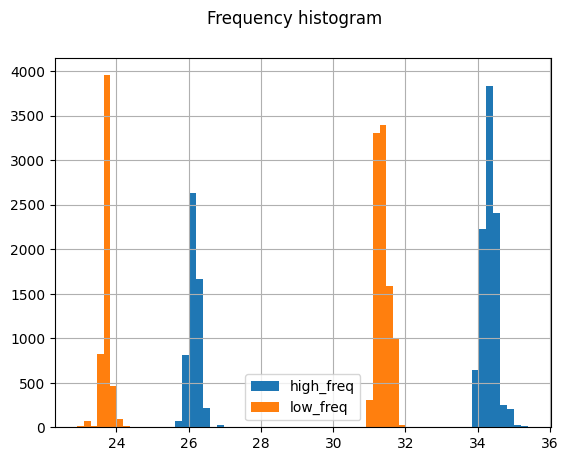

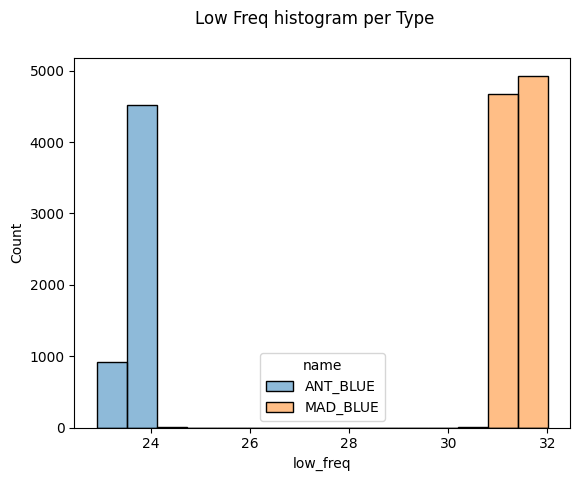

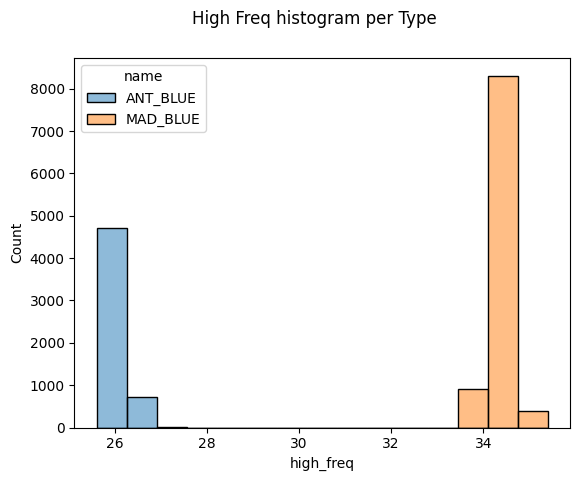

In [8]:
# frequencies
df["high_freq"].hist(bins=50, legend=True)
df["low_freq"].hist(bins=50, legend=True)
plt.suptitle('Frequency histogram')
plt.show()

sns.histplot(df[['low_freq', 'name', 'high_freq']].reset_index(drop=True), x='low_freq', hue='name')
plt.suptitle('Low Freq histogram per Type')
plt.show()

sns.histplot(df[['low_freq', 'name', 'high_freq']].reset_index(drop=True), x='high_freq', hue='name')
plt.suptitle('High Freq histogram per Type')
plt.show()

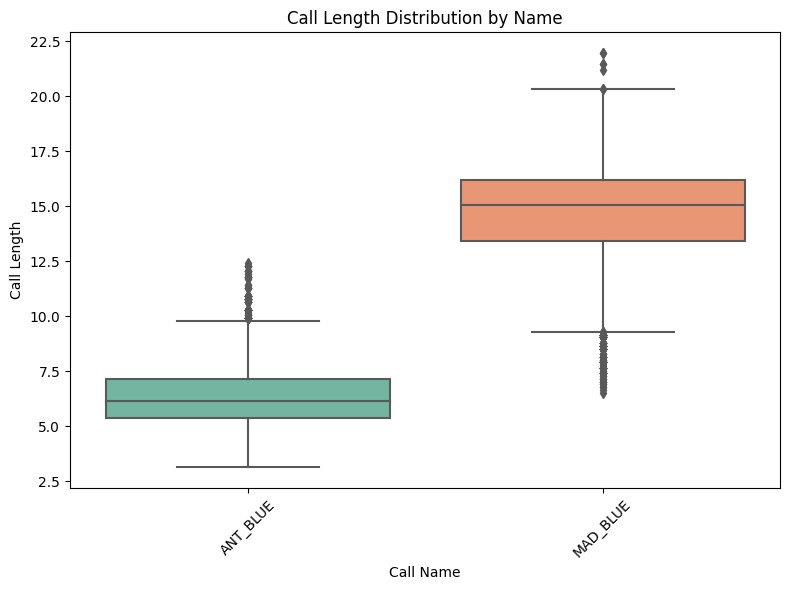

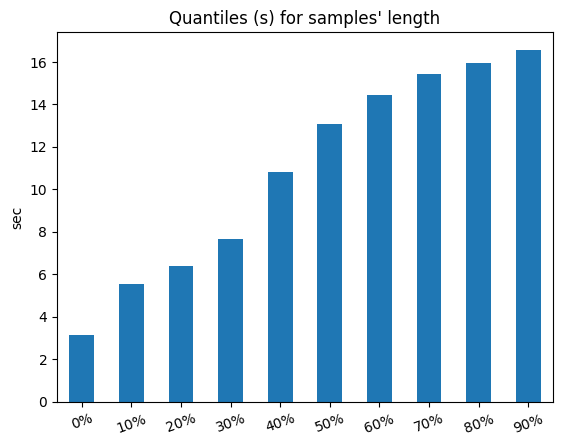

In [9]:
# lengths
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='name', y='call_length', palette="Set2")
plt.title('Call Length Distribution by Name')
plt.xlabel('Call Name')
plt.ylabel('Call Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


quantile_keys = np.arange(0, 1, 0.1)
pd.Series(np.quantile(df['call_length'], quantile_keys), index=map(lambda x: f'{x:.0%}', quantile_keys), name='Quantiles').plot.bar()
plt.title('Quantiles (s) for samples\' length')
plt.xticks(rotation=20)
plt.ylabel('sec')
plt.show()

<AxesSubplot:>

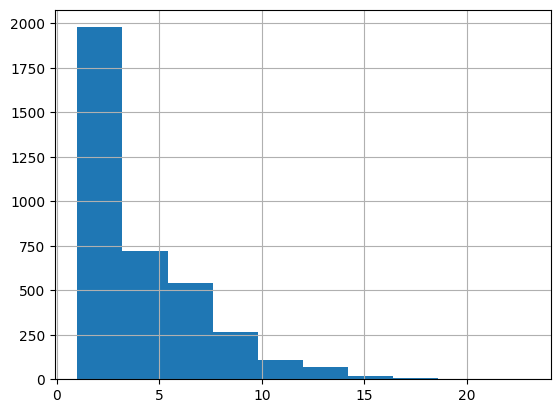

In [10]:
# Relevant WAV files
df.groupby('filename').size().hist()

In [11]:
new_df = pd.DataFrame()
new_df['files'] = list(df['filename'].unique())
new_df.to_csv(BASE_PATH + '/../files_list.csv', index=False)

### BG as noise

In [12]:
def multirange_diff(r1_list, r2_list):
    """Generated the difference between two time ranges"""
    for r2 in r2_list:
        r1_list = list(itertools.chain(*[range_diff(r1, r2) for r1 in r1_list]))
    return r1_list

def range_diff(r1, r2):
    s1, e1 = r1
    s2, e2 = r2
    endpoints = sorted((s1, s2, e1, e2))
    result = []
    if endpoints[0] == s1 and endpoints[1] != s1:
        result.append((endpoints[0], endpoints[1]))
    if endpoints[3] == e1 and endpoints[2] != e1:
        result.append((endpoints[2], endpoints[3]))
    return result

In [13]:
# df_training = df_2.copy()
# df_training = df_training.rename(columns={"type": "label"})
# ## add noise in between calls
# for file in df_training['filename'].unique():
#     file_length = sf.info(os.path.join(BASE_PATH, wav_folder, file)).duration
#     print(f"file {os.path.basename(file)}, length: {file_length}")
#     relevant_annot = df_training[df_training['filename'] == file]
    
#     # Background is the subtraction of the annotated sections from the whole timerange in the file 
#     bg_ranges = np.array(multirange_diff([(0, file_length)], [(relevant_annot['begin_time'].iloc[i], relevant_annot['end_time'].iloc[i]) for i in range(len(relevant_annot))])).astype(float)
#     if len(bg_ranges)>1:
#         # Noise exists in all channels, signal exists only in the channel it was annotated in
#         bg_annot = pd.DataFrame({'begin_time': bg_ranges[:, 0], 'end_time': bg_ranges[:, 1], 'call_length': bg_ranges[:, 1]-bg_ranges[:, 0], 'label': ['Noise']*len(bg_ranges), 'filename':[file] * len(bg_ranges)})

#         df_training = pd.concat([df_training, bg_annot], axis=0, ignore_index=True)

In [14]:
# df_training['filename'] = df_training['filename'].str.replace('.WAV','').str.replace('.wav', '')

### names to numbers

In [15]:
# '''
# mapper = {'Noise': 0, 'whistle': 1, "buzz": 2, "barks": 3, "echo": 4, "unknown": -1}
# '''
# df_training['label'] = df_training['label'].apply(lambda x: 0 if x=="Noise" else 1 if x=="whistle" else 2 if x=="buzz" else 3 if x=='barks' else 4 if x=="echo" else -1)
# df_training['label'].value_counts()

In [16]:
# ## filter calls if they're overlapped with the desired class
# def time_intersects(x, y):
#     return min(y['end_time'], x['end_time']) - max(y['begin_time'], x['begin_time']) > 0


# def clear_overlapped_noise(df):
#     rows_to_drop = []
#     dfg = df.groupby('filename')
#     for name, g in dfg:
#         g = g.sort_values('end_time')
#         # lines of the same group
#         for idx, row in g.iterrows():
#             if row['label'] == 0:
#                 for jdx, other in g.iterrows():
#                     minn = min(row['begin_time'], other['begin_time'])
#                     maxx = max(row['end_time'], other['end_time'])
# §§§
#                     if other['begin_time'] < minn:
#                         continue
#                     elif other['end_time'] > maxx:
#                         break
                        
#                     if other['label'] == 1 and time_intersects(row, other):
#                         rows_to_drop.append(idx)
#                         break

#     # Drop the rows
#     df_cleaned = df.drop(rows_to_drop)
#     return df_cleaned

In [17]:
# ## one class Vs all

# # Whistle VS ALL
# df_training_whisles = df_training.copy()[df_training['label'] > -1]
# df_training_whisles['label'] = df_training_whisles['label'].apply(lambda x: 1 if x==1 else 0)
# df_training_whisles = clear_overlapped_noise(df_training_whisles)

# # Buzz VS ALL
# df_training_buzz = df_training.copy()[df_training['label'] > -1]
# df_training_buzz['label'] = df_training_buzz['label'].apply(lambda x: 1 if x==2 else 0)
# df_training_buzz = clear_overlapped_noise(df_training_buzz)


# # Barks VS ALL
# df_training_barks = df_training.copy()[df_training['label'] > -1]
# df_training_barks['label'] = df_training_barks['label'].apply(lambda x: 1 if x==3 else 0)
# df_training_barks = clear_overlapped_noise(df_training_barks)


# # Echo VS ALL
# df_training_echo = df_training.copy()[df_training['label'] > -1]
# df_training_echo['label'] = df_training_echo['label'].apply(lambda x: 1 if x==4 else 0)
# df_training_echo = clear_overlapped_noise(df_training_echo)


# # ## All calls Vs
# # df_training_calls_vs_all = df_training.copy()
# # df_training_calls_vs_all['label'] = df_training_calls_vs_all['label'].apply(lambda x: 1 if x!=0 else 0)

In [18]:
# def train_val_test_split_disjoint_files(df_training, save, name, test_set=None, val_set=None, train_set=None):
    
#     df_valset = df_training[df_training['filename'].isin(val_set)]
#     df_testset = df_training[df_training['filename'].isin(test_set)] if test_set else None
#     df_trainset = df_training[df_training['filename'].isin(train_set)]
    
#     print(name)
#     print(f'\ntrain: {len(df_trainset)}, val: {len(df_valset)}')
#     print(f"\nfiles:\ntrain: {df_trainset['filename'].unique()}, val: {df_valset['filename'].unique()}")
#     print(f"\ntypes:\ntrain: {df_trainset.value_counts('label')}, val: {df_valset.value_counts('label')}")
    
#     if save:
#         save_train_val_test_dfs(name, df_trainset,df_valset,df_testset)
#         print('done saving')
#     else:
#         return df_trainset,df_valset,df_testset
    
# def save_train_val_test_dfs(name, df_trainset, df_valset, df_testset):
#     basepath = '/Users/shai/personal/deepvoice/amber/data_training_oct26/'
#     os.makedirs(basepath, exist_ok=True)
#     df_trainset.to_csv(basepath+f'train_{name}_new.csv', index=False)
#     df_valset.to_csv(basepath+f'val_{name}_new.csv', index=False)

In [19]:
# train_val_test_split_disjoint_files(df_training, save=True, name='allcls', train_set=train, test_set=[], val_set=val)
# train_val_test_split_disjoint_files(df_training_whisles, save=True, name='whis', train_set=train, test_set=[], val_set=val)
# train_val_test_split_disjoint_files(df_training_buzz, save=True, name='buzz', train_set=train, test_set=[], val_set=val)
# train_val_test_split_disjoint_files(df_training_barks, save=True, name='barks', train_set=train, test_set=[], val_set=val)
# train_val_test_split_disjoint_files(df_training_echo, save=True, name='echo', train_set=train, test_set=[], val_set=val)